<a href="https://colab.research.google.com/github/Mrunali95/Thesis/blob/master/Multivariate_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [ ]:
## Download data of US Dollar Index

dfUSD = web.DataReader('DX-Y.NYB', data_source='yahoo',start='1990-01-01',end='2020-01-01')

dfUSD.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1990-01-01,93.309998,93.080002,93.190002,93.209999,0.0,93.209999
1990-01-02,94.309998,93.080002,93.129997,94.290001,0.0,94.290001
1990-01-03,94.519997,94.080002,94.150002,94.419998,0.0,94.419998
1990-01-04,93.879997,92.389999,93.720001,92.519997,0.0,92.519997
1990-01-05,93.419998,92.550003,93.339996,92.849998,0.0,92.849998


In [ ]:
## download data of NASDAQ index

dfnasdaq = web.DataReader('^IXIC', data_source='yahoo',start='1990-01-01',end='2020-01-01')

dfnasdaq.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1990-01-02,459.299988,452.700012,452.899994,459.299988,110720000,459.299988
1990-01-03,461.600006,460.000000,461.100006,460.899994,152660000,460.899994
1990-01-04,460.799988,456.899994,460.399994,459.399994,147950000,459.399994
1990-01-05,459.399994,457.799988,457.899994,458.200012,137230000,458.200012
1990-01-08,458.700012,456.500000,457.100006,458.700012,115500000,458.700012


In [ ]:
## download data of Dow Jones Industrial Average index

dfdaia = web.DataReader('^DJI', data_source='yahoo',start='1990-01-01',end='2020-01-01')

dfdaia.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1990-01-02,2811.649902,2732.510010,2748.719971,2810.149902,20680000,2810.149902
1990-01-03,2834.040039,2786.260010,2814.199951,2809.729980,23620000,2809.729980
1990-01-04,2821.459961,2766.419922,2804.389893,2796.080078,24370000,2796.080078
1990-01-05,2810.149902,2758.110107,2786.899902,2773.250000,20290000,2773.250000
1990-01-08,2803.969971,2753.409912,2761.729980,2794.370117,16610000,2794.370117


In [ ]:
## download data of S&P 500 index

dfsp = web.DataReader('^GSPC', data_source='yahoo',start='1990-01-01',end='2020-01-01')

dfsp.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1990-01-02,359.690002,351.980011,353.399994,359.690002,162070000,359.690002
1990-01-03,360.589996,357.890015,359.690002,358.760010,192330000,358.760010
1990-01-04,358.760010,352.890015,358.760010,355.670013,177000000,355.670013
1990-01-05,355.670013,351.350006,355.670013,352.200012,158530000,352.200012
1990-01-08,354.239990,350.540009,352.200012,353.790009,140110000,353.790009


In [ ]:
## download data of NYSE index

dfnyse = web.DataReader('^NYA', data_source='yahoo',start='1990-01-01',end='2020-01-01')

dfnyse.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1990-01-02,2093.600098,2093.600098,2093.600098,2093.600098,0,2093.600098
1990-01-03,2091.479980,2091.479980,2091.479980,2091.479980,0,2091.479980
1990-01-04,2075.520020,2075.520020,2075.520020,2075.520020,0,2075.520020
1990-01-05,2058.070068,2058.070068,2058.070068,2058.070068,0,2058.070068
1990-01-08,2065.370117,2065.370117,2065.370117,2065.370117,0,2065.370117


In [ ]:
newdfUSD = dfUSD[(dfUSD.index).isin(dfnasdaq.index)]


In [ ]:
absent = dfdaia[~(dfdaia.index).isin(newdfUSD.index)]

In [ ]:
newdfnasdaq = dfnasdaq[~(dfnasdaq.index).isin(absent.index)]
newdfdaia = dfdaia[~(dfdaia.index).isin(absent.index)]
newdfnyse = dfnyse[~(dfnyse.index).isin(absent.index)]
newdfsp = dfsp[~(dfsp.index).isin(absent.index)]

In [ ]:
finaldata = pd.DataFrame(columns=['USD','NASDAQ','DJAI','NYSE','S&P'])

finaldata['USD'] = newdfUSD['Close']
finaldata['NASDAQ'] = newdfnasdaq['Close']
finaldata['DJAI'] = newdfdaia['Close']
finaldata['NYSE'] = newdfnyse['Close']
finaldata['S&P'] = newdfsp['Close']

finaldata.head()

,USD,NASDAQ,DJAI,NYSE,S&P
Date,,,,,
1990-01-02,94.290001,459.299988,2810.149902,2093.600098,359.690002
1990-01-03,94.419998,460.899994,2809.729980,2091.479980,358.760010
1990-01-04,92.519997,459.399994,2796.080078,2075.520020,355.670013
1990-01-05,92.849998,458.200012,2773.250000,2058.070068,352.200012
1990-01-08,92.050003,458.700012,2794.370117,2065.370117,353.790009


In [ ]:
from sklearn.preprocessing import MinMaxScaler

uscaler = MinMaxScaler(feature_range=(0, 1))
unorm = uscaler.fit_transform(np.array(finaldata['USD']).reshape(-1,1))

nqscaler = MinMaxScaler(feature_range=(0, 1))
nqnorm = nqscaler.fit_transform(np.array(finaldata['NASDAQ']).reshape(-1,1))

dscaler = MinMaxScaler(feature_range=(0, 1))
dnorm = dscaler.fit_transform(np.array(finaldata['DJAI']).reshape(-1,1))

nyscaler = MinMaxScaler(feature_range=(0, 1))
nynorm = nyscaler.fit_transform(np.array(finaldata['NYSE']).reshape(-1,1))

spscaler = MinMaxScaler(feature_range=(0, 1))
spnorm = spscaler.fit_transform(np.array(finaldata['S&P']).reshape(-1,1))

In [ ]:
normdata = pd.DataFrame(columns=['USD','NASDAQ','DJAI','NYSE','S&P'])

normdata['USD'] = unorm.flatten()
normdata['NASDAQ'] = nqnorm.flatten()
normdata['DJAI'] = dnorm.flatten()
normdata['NYSE'] = nynorm.flatten()
normdata['S&P'] = spnorm.flatten()

normdata.index = finaldata.index

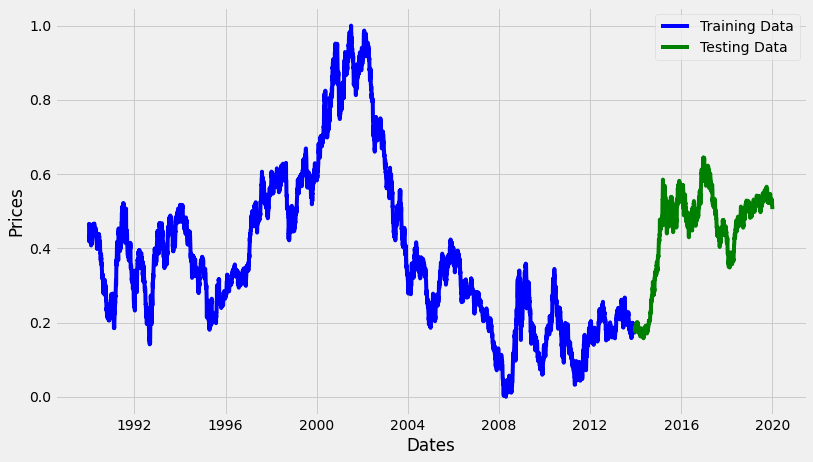

In [ ]:
train_data= normdata[0:int(len(normdata)*0.8)]
test_data = normdata[int(len(normdata)*0.8):]

plt.figure(figsize=(12,7))
plt.xlabel('Dates')
plt.ylabel('Prices')

plt.plot(train_data['USD'], 'blue', label='Training Data')
plt.plot(test_data['USD'], 'green', label='Testing Data')
plt.legend()

In [ ]:
#train_data = np.log(train_data)
trainusd = train_data['USD']
trainexog = train_data.drop(['USD'], axis=1)

testusd = test_data['USD']
testexog = test_data.drop(['USD'], axis=1)

In [ ]:
from statsmodels.tsa.stattools import adfuller
#Perform Dickey-Fuller test:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(trainusd, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

## Applying time shifting, we subtract every the point by the one that preceded it to make data stationary
df2 = trainusd - trainusd.shift()
df2.dropna(inplace=True)
trainusd_stationary = df2

print("\n************After Difference*************\n")

#Perform Dickey-Fuller test:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(trainusd_stationary, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)



Results of Dickey-Fuller Test:
Test Statistic                   -1.618755
p-value                           0.473382
#Lags Used                        0.000000
Number of Observations Used    6019.000000
Critical Value (1%)              -3.431437
Critical Value (5%)              -2.862020
Critical Value (10%)             -2.567026
dtype: float64

************After Difference*************

Results of Dickey-Fuller Test:
Test Statistic                  -78.274708
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    6018.000000
Critical Value (1%)              -3.431437
Critical Value (5%)              -2.862020
Critical Value (10%)             -2.567026
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import adfuller

for i in trainexog.columns:
  from statsmodels.tsa.stattools import adfuller
  #Perform Dickey-Fuller test:
  print('Results of Dickey-Fuller Test:', i)
  dftest = adfuller(trainexog[i], autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)
  print("-------------------------------------------")

  ## Applying time shifting, we subtract every the point by the one that preceded it to make data stationary
exog = pd.DataFrame(columns=['NASDAQ','DJAI','NYSE','S&P'])
for i in trainexog.columns:
  df = trainexog[i] - trainexog[i].shift()
  df.dropna(inplace=True)
  exog[i] = df

print("\n*****************************After Difference**************************************\n")
for i in exog.columns:
  from statsmodels.tsa.stattools import adfuller
  #Perform Dickey-Fuller test:
  print('Results of Dickey-Fuller Test:', i)
  dftest = adfuller(exog[i], autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)
  print("-------------------------------------------")

Results of Dickey-Fuller Test: NASDAQ
Test Statistic                   -1.037217
p-value                           0.739450
#Lags Used                       34.000000
Number of Observations Used    5985.000000
Critical Value (1%)              -3.431443
Critical Value (5%)              -2.862023
Critical Value (10%)             -2.567027
dtype: float64
-------------------------------------------
Results of Dickey-Fuller Test: DJAI
Test Statistic                   -0.552108
p-value                           0.881441
#Lags Used                       34.000000
Number of Observations Used    5985.000000
Critical Value (1%)              -3.431443
Critical Value (5%)              -2.862023
Critical Value (10%)             -2.567027
dtype: float64
-------------------------------------------
Results of Dickey-Fuller Test: NYSE
Test Statistic                   -0.889261
p-value                           0.791488
#Lags Used                       34.000000
Number of Observations Used    5985.00000

In [ ]:
from statsmodels.tsa.stattools import adfuller

for i in testexog.columns:
  from statsmodels.tsa.stattools import adfuller
  #Perform Dickey-Fuller test:
  print('Results of Dickey-Fuller Test:', i)
  dftest = adfuller(testexog[i], autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)
  print("-------------------------------------------")

  ## Applying time shifting, we subtract every the point by the one that preceded it to make data stationary
xexogtest = pd.DataFrame(columns=['NASDAQ','DJAI','NYSE','S&P'])
for i in testexog.columns:
  df = testexog[i] - testexog[i].shift()
  df.dropna(inplace=True)
  xexogtest[i] = df

print("\n*****************************After Difference**************************************\n")
for i in xexogtest.columns:
  from statsmodels.tsa.stattools import adfuller
  #Perform Dickey-Fuller test:
  print('Results of Dickey-Fuller Test:', i)
  dftest = adfuller(xexogtest[i], autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)
  print("-------------------------------------------")

Results of Dickey-Fuller Test: NASDAQ
Test Statistic                    0.378139
p-value                           0.980659
#Lags Used                       19.000000
Number of Observations Used    1486.000000
Critical Value (1%)              -3.434758
Critical Value (5%)              -2.863487
Critical Value (10%)             -2.567807
dtype: float64
-------------------------------------------
Results of Dickey-Fuller Test: DJAI
Test Statistic                    0.180065
p-value                           0.971121
#Lags Used                       19.000000
Number of Observations Used    1486.000000
Critical Value (1%)              -3.434758
Critical Value (5%)              -2.863487
Critical Value (10%)             -2.567807
dtype: float64
-------------------------------------------
Results of Dickey-Fuller Test: NYSE
Test Statistic                   -1.085914
p-value                           0.720656
#Lags Used                        0.000000
Number of Observations Used    1505.00000

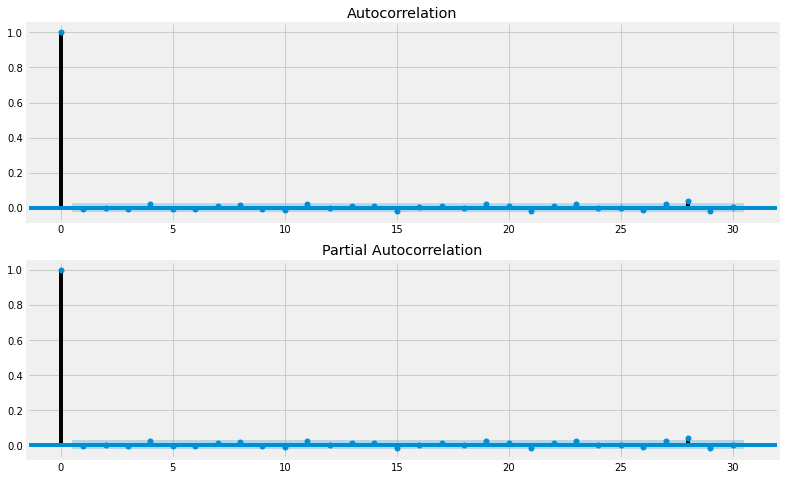

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
import statsmodels.api as sm
%matplotlib inline

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(trainusd_stationary, lags = 30, ax= ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(trainusd_stationary, lags = 30, ax = ax2)
pyplot.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")
import itertools
p = q = range(0, 4)
d = range(0,2)
pdq = list(itertools.product(p, d, q))
P = D = Q = range(0, 2)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]


for param in pdq:
    for param_seasonal in seasonal_pdq:
        #try:
            mod = SARIMAX(trainusd_stationary,order=param,seasonal_order=param_seasonal,exog = exog, initialization='approximate_diffuse')
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        #except: 
            #continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:-39383.24721144985
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:-39131.248450624946
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-35086.53216286453
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-39223.02095660887
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-39154.78773867105
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-39134.76890972894
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-36630.77231784389
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-38947.79607950617
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:-39376.861753109726
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:-39109.66937460534


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(trainusd_stationary,order=(2,1,3),seasonal_order=(0,1,1,12),exog = exog, initialization='approximate_diffuse')

model_fit = model.fit()  
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                                USD   No. Observations:                 6019
Model:             SARIMAX(2, 1, 3)x(0, 1, 1, 12)   Log Likelihood               19538.461
Date:                            Wed, 12 Aug 2020   AIC                         -39054.922
Time:                                    23:38:23   BIC                         -38981.217
Sample:                                         0   HQIC                        -39029.328
                                           - 6019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
NASDAQ        -0.3354      0.059     -5.719      0.000      -0.450      -0.220
DJAI           0.3500      0.098   

In [ ]:
# invert the differenced forecast to something usable
forecast = model_fit.predict(start = len(trainusd_stationary), end= len(trainusd_stationary)+len(xexogtest)-1, exog=xexogtest)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [ ]:
pred = pd.Series(forecast)

pcs = pred.cumsum()

pcs = pcs + 0.176115
p = np.array(pcs).reshape(-1,1)
p = uscaler.inverse_transform(p)
p = np.array(p).flatten()

p = pd.Series(p, index=xexogtest.index)

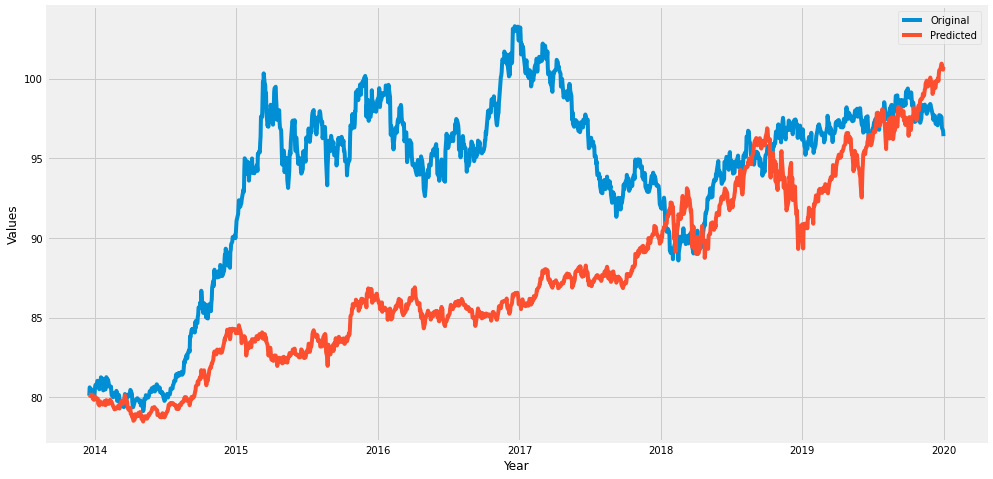

In [ ]:
t = (finaldata['USD'][-len(pcs):])
plt.figure(figsize=(15,8))
plt.plot(t)
plt.plot(p)
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(['Original','Predicted'])

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = math.sqrt(mean_squared_error(t, p))
print('Root Mean Squared Error: %.3f'% rmse)
mae = mean_absolute_error(t, p)
print('Mean Absolute Error: %.3f'% mae)
mape = np.mean(np.abs(p - t)/np.abs(t))
print('Mean Absolute Percentage Error: %.3f'% mape)

Root Mean Squared Error: 8.253
Mean Absolute Error: 6.491
Mean Absolute Percentage Error: 0.067


In [ ]:
"""
from google.colab import drive
drive.mount('drive')
data = pd.DataFrame(columns=['A_yt','A_pt'])
data['A_yt'] = t
data['A_pt'] = p
data.to_csv('Finalresult.csv')
!cp Finalresult.csv "drive/My Drive/"

"""

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at drive


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                                USD   No. Observations:                 6019
Model:             SARIMAX(2, 1, 4)x(0, 1, 1, 12)   Log Likelihood               19191.254
Date:                            Tue, 11 Aug 2020   AIC                         -38364.508
Time:                                    13:14:40   BIC                         -38304.204
Sample:                                         0   HQIC                        -38343.567
                                           - 6019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
DJAI          -0.2396      0.024    -10.029      0.000      -0.286      -0.193
ar.L1         -1.7905      0.081   

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


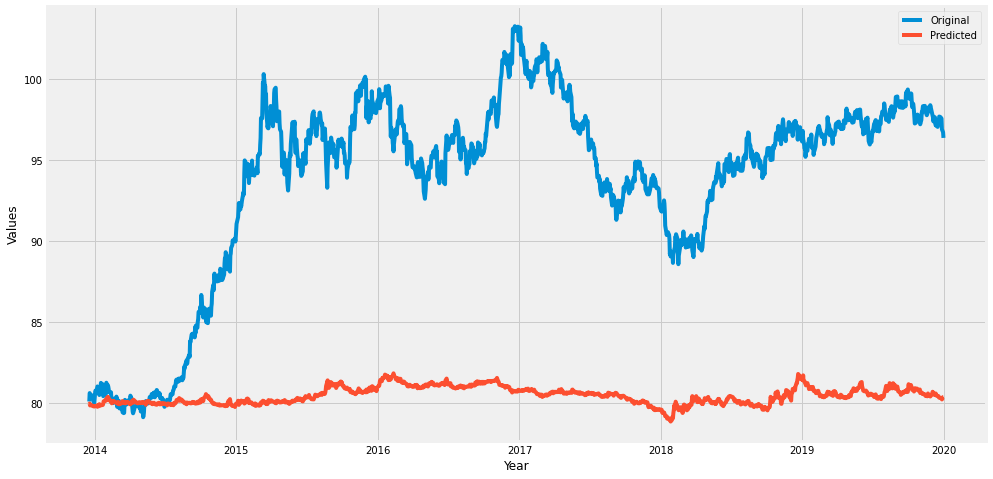

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(trainusd_stationary,order=(2,1,4),seasonal_order=(0,1,1,12),exog = exog['DJAI'], initialization='approximate_diffuse')
model_fit = model.fit()  
print(model_fit.summary())

a = np.array(xexogtest['DJAI'])
a = a.reshape(1505,1)

# invert the differenced forecast to something usable
forecast1 = model_fit.predict(start = len(trainusd_stationary), end= len(trainusd_stationary)+len(xexogtest)-1, exog=a)
pred1 = pd.Series(forecast1)

pcs1 = pred1.cumsum()
pcs1 = pcs1 + 0.176115
p1 = np.array(pcs1).reshape(-1,1)
p1 = uscaler.inverse_transform(p1)
p1 = np.array(p1).flatten()
p1 = pd.Series(p1, index=xexogtest.index)

t = (finaldata['USD'][-len(pcs1):])
plt.figure(figsize=(15,8))
plt.plot(t)
plt.plot(p1)
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(['Original','Predicted'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                                USD   No. Observations:                 6019
Model:             SARIMAX(2, 1, 4)x(0, 1, 1, 12)   Log Likelihood               19201.195
Date:                            Tue, 11 Aug 2020   AIC                         -38384.391
Time:                                    13:13:01   BIC                         -38324.086
Sample:                                         0   HQIC                        -38363.450
                                           - 6019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
NASDAQ        -0.1508      0.023     -6.436      0.000      -0.197      -0.105
ar.L1         -1.9012      0.054   

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


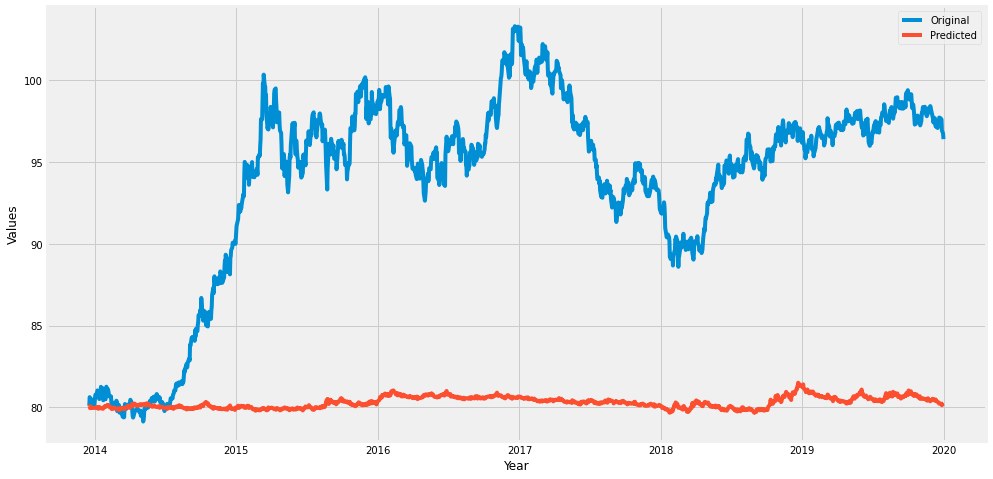

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(trainusd_stationary,order=(2,1,4),seasonal_order=(0,1,1,12),exog = exog['NASDAQ'], initialization='approximate_diffuse')
model_fit = model.fit()  
print(model_fit.summary())

a = np.array(xexogtest['NASDAQ'])
a = a.reshape(1505,1)

# invert the differenced forecast to something usable
forecast2 = model_fit.predict(start = len(trainusd_stationary), end= len(trainusd_stationary)+len(xexogtest)-1, exog=a)
pred2 = pd.Series(forecast2)

pcs2 = pred2.cumsum()
pcs2 = pcs2 + 0.176115
p2 = np.array(pcs2).reshape(-1,1)
p2 = uscaler.inverse_transform(p2)
p2 = np.array(p2).flatten()
p2 = pd.Series(p2, index=xexogtest.index)

t = (finaldata['USD'][-len(pcs1):])
plt.figure(figsize=(15,8))
plt.plot(t)
plt.plot(p2)
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(['Original','Predicted'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                                USD   No. Observations:                 6019
Model:             SARIMAX(2, 1, 4)x(0, 1, 1, 12)   Log Likelihood               19195.923
Date:                            Tue, 11 Aug 2020   AIC                         -38373.847
Time:                                    13:10:11   BIC                         -38313.542
Sample:                                         0   HQIC                        -38352.906
                                           - 6019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
NYSE          -0.3179      0.017    -18.812      0.000      -0.351      -0.285
ar.L1         -1.7422      0.081   

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


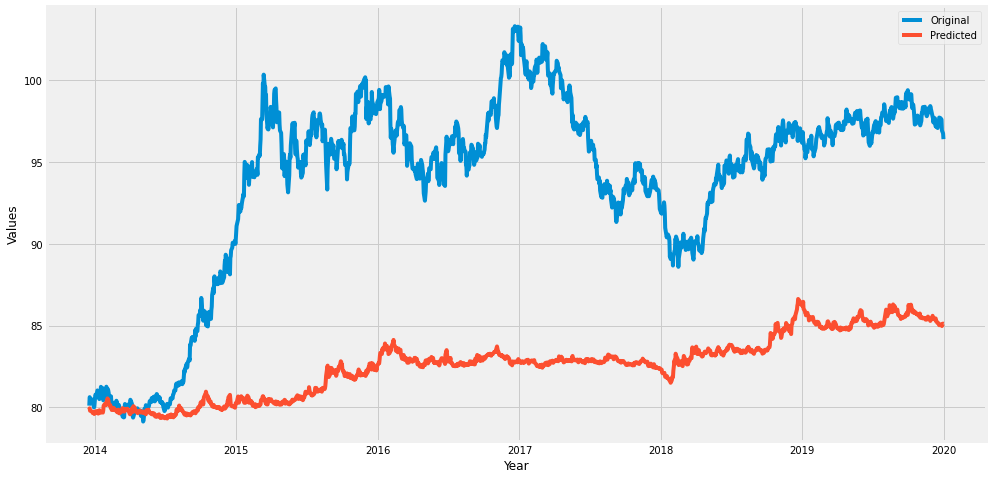

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(trainusd_stationary,order=(2,1,4),seasonal_order=(0,1,1,12),exog = exog['NYSE'], initialization='approximate_diffuse')
model_fit = model.fit()  
print(model_fit.summary())

a = np.array(xexogtest['NYSE'])
a = a.reshape(1505,1)

# invert the differenced forecast to something usable
forecast3 = model_fit.predict(start = len(trainusd_stationary), end= len(trainusd_stationary)+len(xexogtest)-1, exog=a)
pred3 = pd.Series(forecast3)

pcs3 = pred3.cumsum()
pcs3 = pcs3 + 0.176115
p3 = np.array(pcs3).reshape(-1,1)
p3 = uscaler.inverse_transform(p3)
p3 = np.array(p3).flatten()
p3 = pd.Series(p3, index=xexogtest.index)

t = (finaldata['USD'][-len(pcs1):])
plt.figure(figsize=(15,8))
plt.plot(t)
plt.plot(p3)
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(['Original','Predicted'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                 Statespace Model Results                                 
Dep. Variable:                                USD   No. Observations:                 6019
Model:             SARIMAX(2, 1, 4)x(0, 1, 1, 12)   Log Likelihood               19181.401
Date:                            Tue, 11 Aug 2020   AIC                         -38344.802
Time:                                    13:16:41   BIC                         -38284.497
Sample:                                         0   HQIC                        -38323.861
                                           - 6019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
S&P           -0.2588      0.023    -11.395      0.000      -0.303      -0.214
ar.L1         -1.8335      0.074   

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


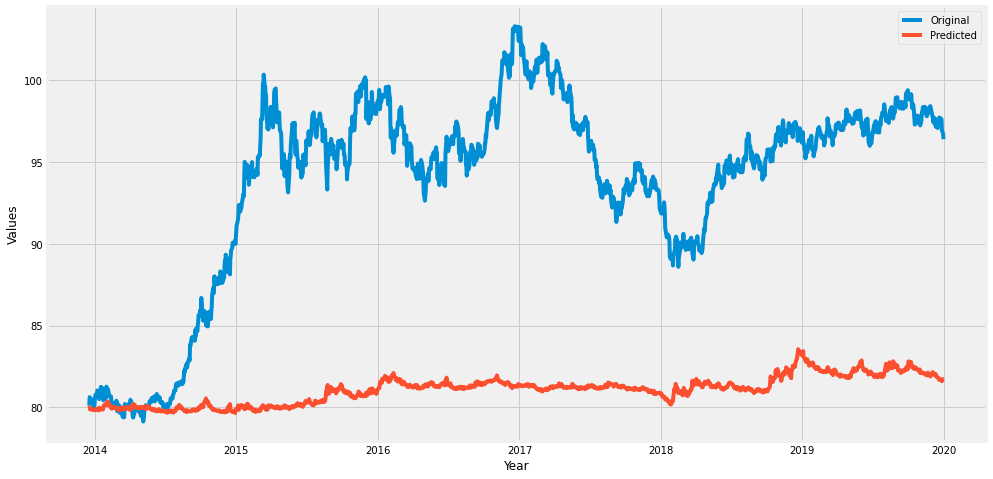

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(trainusd_stationary,order=(2,1,4),seasonal_order=(0,1,1,12),exog = exog['S&P'], initialization='approximate_diffuse')
model_fit = model.fit()  
print(model_fit.summary())

a = np.array(xexogtest['S&P'])
a = a.reshape(1505,1)

# invert the differenced forecast to something usable
forecast4 = model_fit.predict(start = len(trainusd_stationary), end= len(trainusd_stationary)+len(xexogtest)-1, exog=a)
pred4 = pd.Series(forecast4)

pcs4 = pred4.cumsum()
pcs4 = pcs4 + 0.176115
p4 = np.array(pcs4).reshape(-1,1)
p4 = uscaler.inverse_transform(p4)
p4 = np.array(p4).flatten()
p4 = pd.Series(p4, index=xexogtest.index)

t = (finaldata['USD'][-len(pcs1):])
plt.figure(figsize=(15,8))
plt.plot(t)
plt.plot(p4)
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(['Original','Predicted'])

Text(0, 0.5, 'Values')

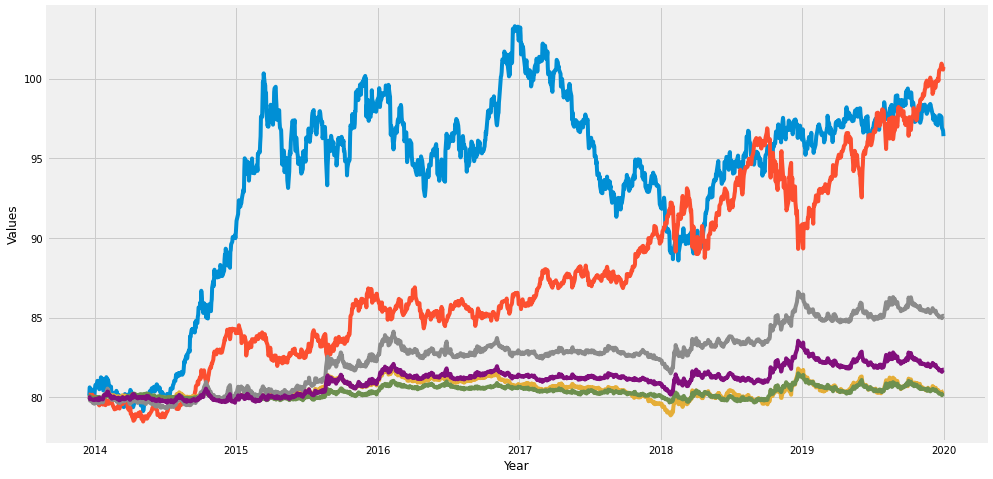

In [ ]:
t = (finaldata['USD'][-len(pcs1):])
plt.figure(figsize=(15,8))
plt.plot(t)
plt.plot(p)
plt.plot(p1)
plt.plot(p2)
plt.plot(p3)
plt.plot(p4)

plt.xlabel('Year')
plt.ylabel('Values')